# Understanding the problem statement

Analyzing different climatic condition to group crops into different clusters which require similar conditions to grow.
##We will use K-means clustering to perform multi-class classification and predict which crop can be grown with the given condition.


In [1]:
#lets import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns

import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

import ipywidgets
from ipywidgets import interact

# Reading the Dataset

In [2]:
full_data=pd.read_csv('Desktop/Crop segmentation.csv')
print('The shape of the dataset is: ', full_data.shape)

The shape of the dataset is:  (2200, 8)


In [3]:
full_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


N- Nitrogen content in the soil.

P- Phosphorous content in the soil.

K- Potassium content in the soil.

Temperature is in degree celsius.

Humidity (Relative humidity) is in percentage.

pH- pH value of the soil.

Rainfall in mm.

In [4]:
#Checking for missing values
full_data.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

As can be seen there are no missing values in the dataset

In [5]:
#lets see the crops in the dataset
full_data['label'].value_counts()

cotton         100
mothbeans      100
pomegranate    100
kidneybeans    100
apple          100
mungbean       100
coffee         100
maize          100
orange         100
chickpea       100
jute           100
grapes         100
coconut        100
muskmelon      100
blackgram      100
banana         100
mango          100
lentil         100
pigeonpeas     100
papaya         100
rice           100
watermelon     100
Name: label, dtype: int64

In total, there are 22 different crops

# Descriptive statistics

In [6]:
#Lets check the numerical columns
num_col=[col for col in full_data.columns if full_data[col].dtypes!='object']
num_col

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

In [7]:
#Lets check the summary statistics for each numerical column
for i in num_col:
    a=round(full_data[i].mean(),2)
    b=full_data[i].min()
    c=full_data[i].max()
    print('----------------------------------')
    print('The average {} is: {}'.format(i,a))
    print('The min {} is: {}'.format(i,b))
    print('The max {} is: {}'.format(i,c))
    print('----------------------------------')

----------------------------------
The average N is: 50.55
The min N is: 0
The max N is: 140
----------------------------------
----------------------------------
The average P is: 53.36
The min P is: 5
The max P is: 145
----------------------------------
----------------------------------
The average K is: 48.15
The min K is: 5
The max K is: 205
----------------------------------
----------------------------------
The average temperature is: 25.62
The min temperature is: 8.825674745
The max temperature is: 43.67549305
----------------------------------
----------------------------------
The average humidity is: 71.48
The min humidity is: 14.25803981
The max humidity is: 99.98187601
----------------------------------
----------------------------------
The average ph is: 6.47
The min ph is: 3.504752314
The max ph is: 9.93509073
----------------------------------
----------------------------------
The average rainfall is: 103.46
The min rainfall is: 20.21126747
The max rainfall is: 298.5

In [8]:
#Lets check the summary statistics of all the conditions for each crop
@interact
def summary(crops=full_data['label'].unique()):
    '''
    The argument of the function is all the different crops in the label column of the dataset.
    
    '''
    x=full_data[full_data['label']==crops]
    for i in num_col:
        print('----------------------------------')
        print('Statistics for {}'.format(i))
        print('Min {} : {}'.format(i,x[i].min()))
        print('Mean {} : {}'.format(i, x[i].mean()))
        print('Max {} : {}'.format(i, x[i].max()))
        print('----------------------------------')

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'chickpea', 'kidneybeans', 'pige…

In [9]:
#Lets compare the average requirement for each crop with average condition
crops=full_data['label'].unique()

@interact
def summary(conditions=[col for col in full_data.columns if full_data[col].dtypes!='object']):
    ''''
The argument for the function is all the numerical columns of the datatset, i.e.,
'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'

    '''
    a=round(full_data[conditions].mean(),2) #rounding the mean to 2 decimal places
    print('The average {} is: {}'.format(conditions,a))
    for j in crops:
        x=full_data[full_data['label']==j]
        b=round(x[conditions].mean(),2)#rounding the mean to 2 decimal places
        print('{} is: {}'.format(j,b))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

In [10]:
#lets check the crops which require more than the average of given condition

crops=full_data['label'].unique()
@interact
def compare(conditions=[col for col in full_data.columns if full_data[col].dtypes!='object']):
    print('Crops which require greater than average {} are : '.format(conditions))
    a=full_data[conditions].mean()
    for j in crops:
        x=full_data[full_data['label']==j]
        b=x[conditions].mean()
        if a<b:
            print(j)  

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

In [11]:
#lets check the crops which require less than the average of given condition

crops=full_data['label'].unique()
@interact
def compare(conditions=[col for col in full_data.columns if full_data[col].dtypes!='object']):
    print('Crops which require less than average {} are : '.format(conditions))
    a=full_data[conditions].mean()
    for j in crops:
        x=full_data[full_data['label']==j]
        b=x[conditions].mean()
        if a>b:
            print(j)  

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'humidity', 'p…

# Analyzing the agricultural conditions

In [12]:
num_col

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

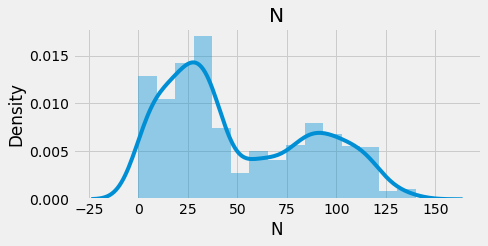

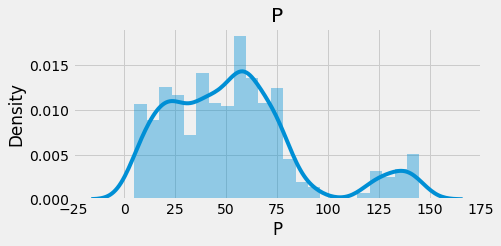

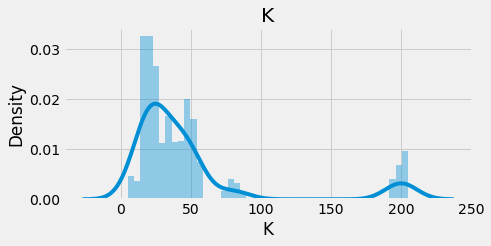

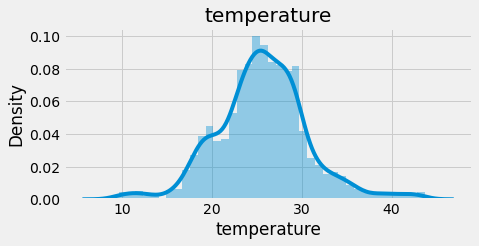

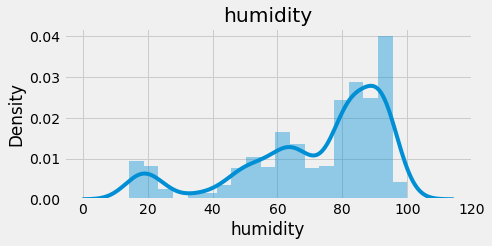

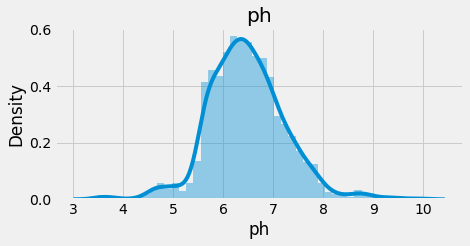

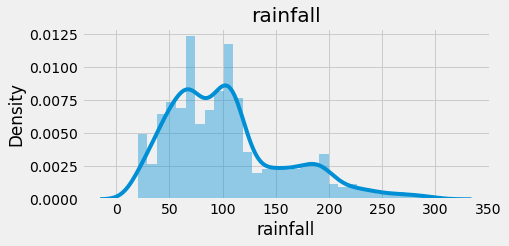

In [13]:
#lets check the distribution of 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'
for i,feature in enumerate(num_col):
    plt.figure(figsize=(30,10))
    plt.subplot(340 + 1 + i)
    sns.distplot(full_data[feature])
    plt.title(feature)
    plt.show()


In [14]:
num_col

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

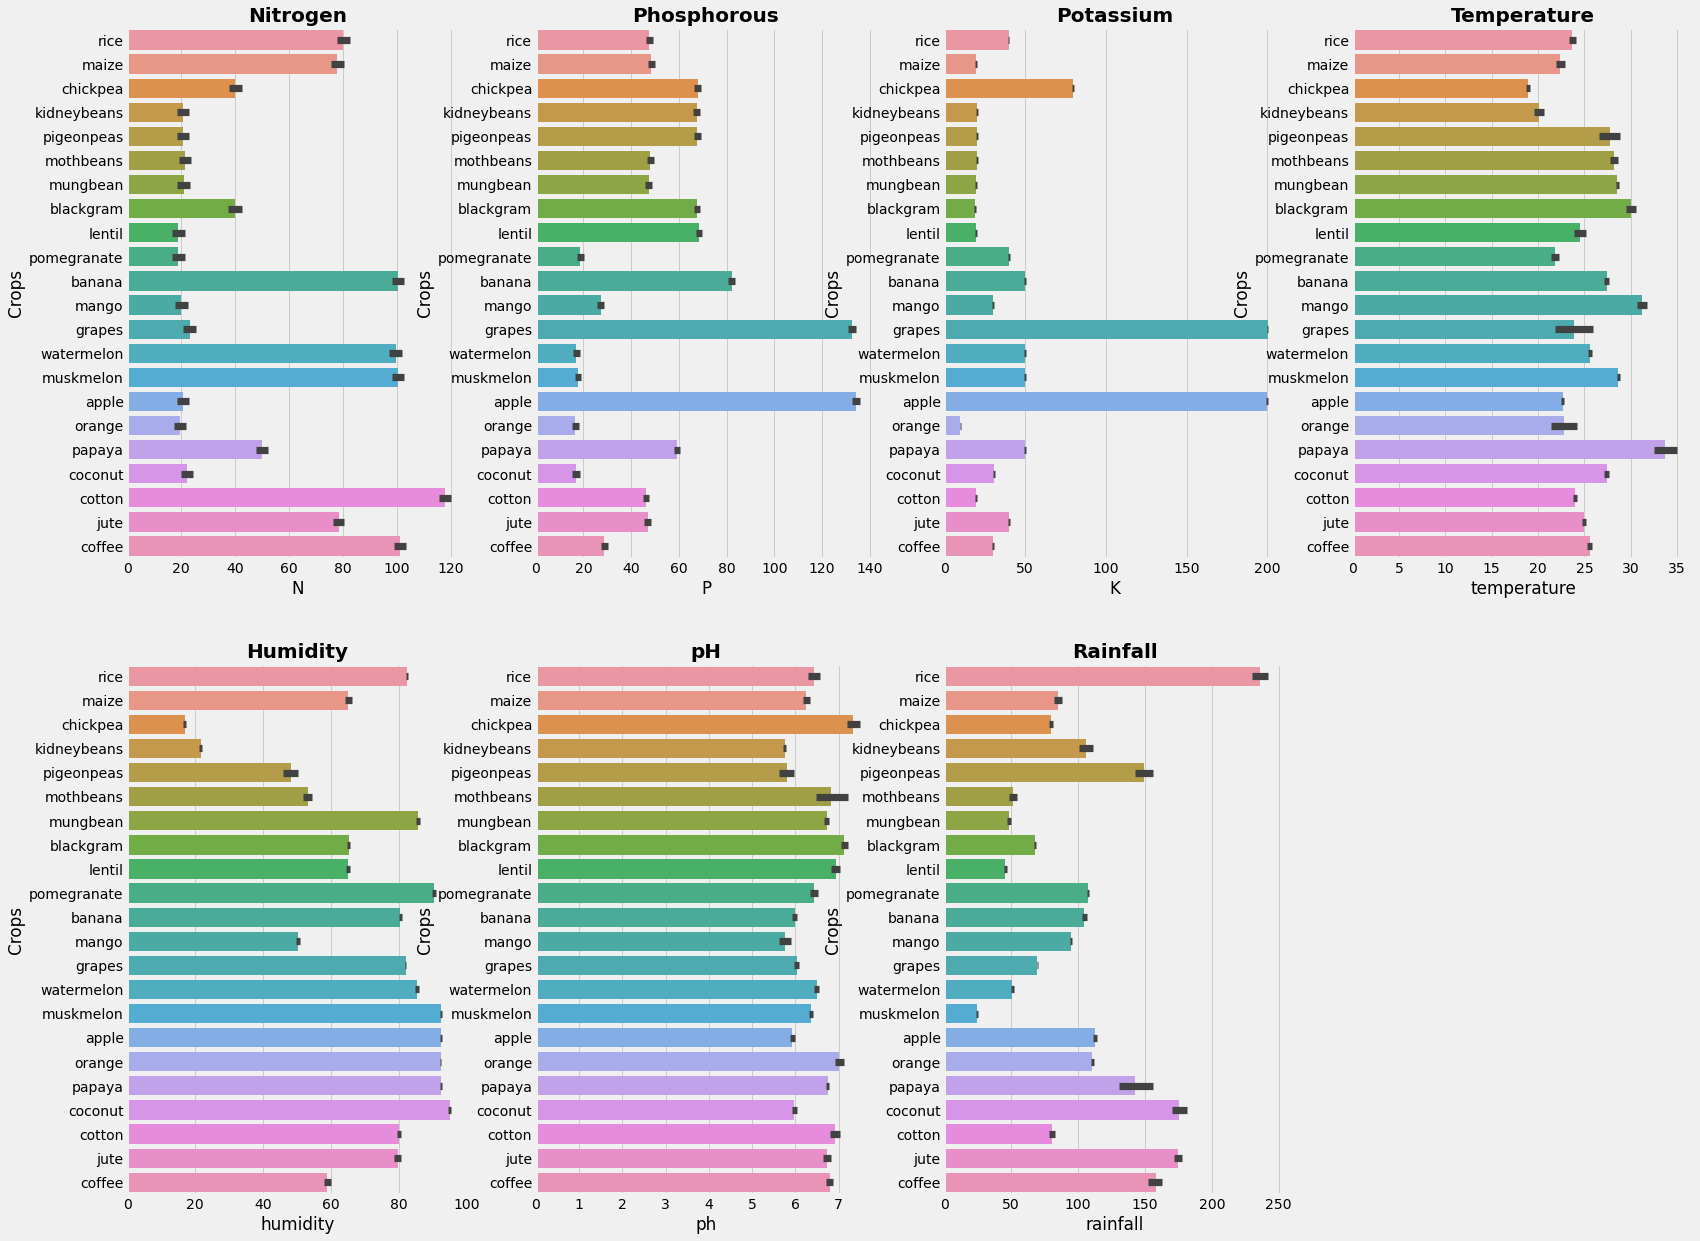

In [15]:
#lets check the distribution of 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'

plt.figure(figsize=(25, 20))
plt.subplot(2,4,1)
sns.barplot(full_data['N'],full_data['label'])
plt.title('Nitrogen',fontweight="bold", size=20)
plt.ylabel('Crops')
plt.subplot(2,4,2)
sns.barplot(full_data['P'],full_data['label'])
plt.title('Phosphorous',fontweight="bold", size=20)
plt.ylabel('Crops')
plt.subplot(2,4,3)
sns.barplot(full_data['K'],full_data['label'])
plt.title('Potassium',fontweight="bold", size=20)
plt.ylabel('Crops')
plt.subplot(2,4,4)
sns.barplot(full_data['temperature'],full_data['label'])
plt.title('Temperature',fontweight="bold", size=20)
plt.ylabel('Crops')
plt.subplot(2,4,5)
sns.barplot(full_data['humidity'],full_data['label'])
plt.title('Humidity',fontweight="bold", size=20)
plt.ylabel('Crops')
plt.subplot(2,4,6)
sns.barplot(full_data['ph'],full_data['label'])
plt.title('pH',fontweight="bold", size=20)
plt.ylabel('Crops')
plt.subplot(2,4,7)
sns.barplot(full_data['rainfall'],full_data['label'])
plt.title('Rainfall',fontweight="bold", size=20)
plt.ylabel('Crops')
plt.show()


The above plots show that cotton required very high nitrogen, apple and grapes require high phosphorous, apple and grapes require high potassium.
Also, almost all the crop required pH value greater than 5 in the soil to grow.

In [16]:
#lets find the crops which require very high quantity of 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'

print('Crops which require very high content of Nitrogen in the soil : ',full_data[full_data['N']>120]['label'].unique())
print('                                                 ')
print('Crops which require very high content of Phosphorous in the soil : ',full_data[full_data['P']>100]['label'].unique())
print('                                                 ')
print('Crops which require very high content of Potassium in the soil : ',full_data[full_data['K']>200]['label'].unique())
print('                                                 ')
print('Crops which require high temperatures : ',full_data[full_data['temperature'] > 40]['label'].unique())
print('Crops which require low temperatures : ',full_data[full_data['temperature'] < 10]['label'].unique())
print('                                                 ')
print('Crops which require high humidity : ',full_data[full_data['humidity'] > 90]['label'].unique())
print('Crops which require low humidity : ',full_data[full_data['humidity'] < 20]['label'].unique())
print('                                                 ')
print('Crops which require very high ph : ',full_data[full_data['ph'] > 8]['label'].unique())
print('Crops which require very low ph : ',full_data[full_data['ph'] < 4]['label'].unique())
print('                                                 ')
print('Crops which require high rainfall : ',full_data[full_data['rainfall'] > 230]['label'].unique())
print('Crops which require low rainfall : ',full_data[full_data['rainfall'] < 40]['label'].unique())

Crops which require very high content of Nitrogen in the soil :  ['cotton']
                                                 
Crops which require very high content of Phosphorous in the soil :  ['grapes' 'apple']
                                                 
Crops which require very high content of Potassium in the soil :  ['grapes' 'apple']
                                                 
Crops which require high temperatures :  ['grapes' 'papaya']
Crops which require low temperatures :  ['grapes']
                                                 
Crops which require high humidity :  ['pomegranate' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut']
Crops which require low humidity :  ['chickpea' 'kidneybeans']
                                                 
Crops which require very high ph :  ['chickpea' 'mothbeans']
Crops which require very low ph :  ['mothbeans']
                                                 
Crops which require high rainfall :  ['rice' 'papaya']
Crops which

We can see that grapes can be grown in both high and low temperatures. Hence, it can be said that tempeartures does not affect the cultivation of grapes.
We can see that mothbeans can be grown in a soil with both high and low pH value. Hence, it can be said that pH of the soil does not affect the cultivation of mothbeans.

In [17]:
#Lets find the crops which can be grown in summer, winter and rainy season.
print('Summer crops')
print('Crops which can be grown in summers : ', full_data[(full_data['temperature'] > 30) & (full_data['humidity'] > 70)]['label'].unique())
print('----------------------------------------------------------------------')
print('Winter crops')
print('Crops which can be grown in winters : ', full_data[(full_data['temperature'] < 20) & (full_data['humidity'] < 30)]['label'].unique())
print('----------------------------------------------------------------------')
print('Rainy crops')
print('Crops which can be grown in rainy season : ', full_data[(full_data['temperature'] > 25)& (full_data['humidity'] > 70) & (full_data['rainfall'] > 150)]['label'].unique())
print('----------------------------------------------------------------------')

Summer crops
Crops which can be grown in summers :  ['grapes' 'orange' 'papaya']
----------------------------------------------------------------------
Winter crops
Crops which can be grown in winters :  ['chickpea' 'kidneybeans']
----------------------------------------------------------------------
Rainy crops
Crops which can be grown in rainy season :  ['rice' 'papaya' 'coconut' 'jute']
----------------------------------------------------------------------


# Clustering similar crops

In [18]:
X=full_data.drop('label',axis=1)
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


Text(0, 0.5, 'Wss')

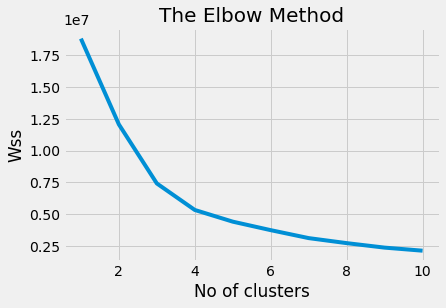

In [19]:
#Using the elbow method to determine the optimal number of clusters
from sklearn.cluster import KMeans
wss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    wss.append(km.inertia_)    
plt.plot(range(1,11),wss)
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('No of clusters')
plt.ylabel('Wss')


The plot shows that the optimal number of clusters must be 4.

In [20]:
#implementing the KMeans algorithm on the dataset.
km=KMeans(n_clusters=4,init='k-means++',n_init=10,max_iter=300,random_state=0)
y_means=km.fit_predict(X)
y_means

array([2, 2, 2, ..., 2, 3, 2])

In [21]:
data=full_data.copy()
data['clusters']=y_means
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label,clusters
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,2
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,2
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,2
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,2
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,2


In [22]:
print('Crops in the first cluster', data[data['clusters']==0]['label'].unique())
print('                                                            ')
print('Crops in the second cluster', data[data['clusters']==1]['label'].unique())
print('                                                            ')
print('Crops in the third cluster', data[data['clusters']==2]['label'].unique())
print('                                                            ')
print('Crops in the fourth cluster', data[data['clusters']==3]['label'].unique())

Crops in the first cluster ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
                                                            
Crops in the second cluster ['grapes' 'apple']
                                                            
Crops in the third cluster ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
                                                            
Crops in the fourth cluster ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']


As we can see there are few crops in multiple clusters, for example, coffee is in first as well as in second clsuter.
So, we need to do hard clustering

In [23]:
#For hard clustering, we are ging to remove those crops from each clusters if value count of the crop is less than 50. 
print('Results of hard clustering')
print('-------------------------------------------------------')
counts=data[data['clusters']==0]['label'].value_counts().reset_index()
a=counts[counts['label']>=50]['index'].values #this return the crops which repeats more than 50 times in one cluster.
print('Crops in the first cluster', a)
print('                                                            ')

counts=data[data['clusters']==1]['label'].value_counts().reset_index()
b=counts[counts['label']>=50]['index'].values
print('Crops in the second cluster', b)
print('                                                            ')

counts=data[data['clusters']==2]['label'].value_counts().reset_index()
c=counts[counts['label']>=50]['index'].values
print('Crops in the third cluster', c)
print('                                                            ')

counts=data[data['clusters']==3]['label'].value_counts().reset_index()
d=counts[counts['label']>=50]['index'].values
print('Crops in the fourth cluster', d)

Results of hard clustering
-------------------------------------------------------
Crops in the first cluster ['mothbeans' 'lentil' 'chickpea' 'mango' 'orange' 'mungbean' 'kidneybeans'
 'blackgram' 'pomegranate']
                                                            
Crops in the second cluster ['grapes' 'apple']
                                                            
Crops in the third cluster ['rice' 'jute' 'coconut' 'coffee' 'pigeonpeas' 'papaya']
                                                            
Crops in the fourth cluster ['cotton' 'banana' 'muskmelon' 'watermelon' 'maize']


# Predictive modeling

In [24]:
#lets split the data into dependent and indepenedent dataset
x=full_data.drop(['label'],axis=1)
y=full_data['label']

#lets check the shape of x and y
print('Shape of x : ',x.shape)
print('Shape of y : ',y.shape)

Shape of x :  (2200, 7)
Shape of y :  (2200,)


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#lets check the shape of x_train,x_test,y_train,y_test

print('Shape of x_train : ',x_train.shape)
print('Shape of y_train : ',y_train.shape)
print('Shape of x_test : ',x_test.shape)
print('Shape of y_test : ',y_test.shape)

Shape of x_train :  (1760, 7)
Shape of y_train :  (1760,)
Shape of x_test :  (440, 7)
Shape of y_test :  (440,)


In [26]:
#we will use logistic regression to do the predictive modeling

from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

Text(0.5, 1.0, 'Confusion matrix for logistic regression')

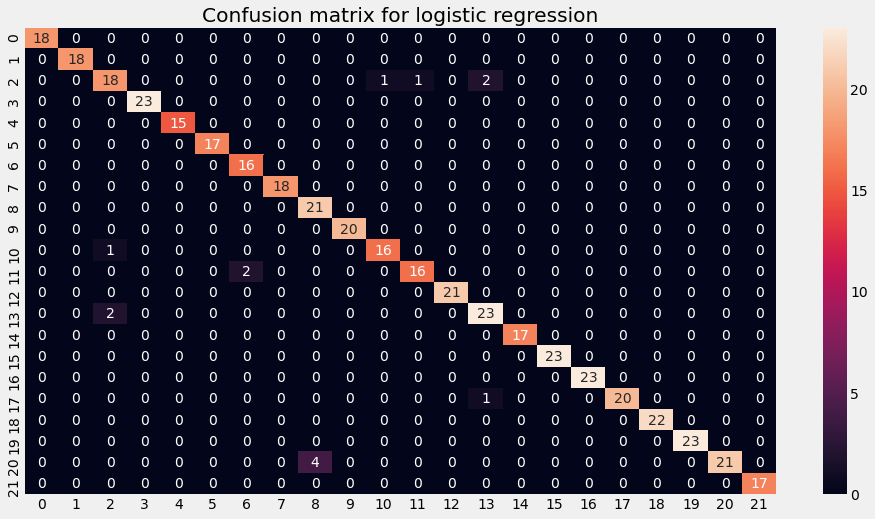

In [27]:
#lets plot the confusion matrix
from sklearn.metrics import classification_report, confusion_matrix


cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(15,8))
sns.heatmap(cm,annot=True)
plt.title('Confusion matrix for logistic regression')

In [28]:
#lets print the classification report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [29]:
#lets do the real time prediction.
full_data[full_data['label']=='rice'].head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


As we can see, the values of 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label' are 90, 42,43,20,82,7,203.
Lets use these values to check whether our model predicts the crop as 'rice'.

In [30]:
prediction = model.predict(np.array([[90, 42,43,20,82,7,203]]))
prediction

array(['rice'], dtype=object)

As we can see our model predicted the crop as rice. So, our model is working fine.

In [31]:
#lets do the real time prediction once again for 'orange'.
full_data[full_data['label']=='orange'].head()

,N,P,K,temperature,humidity,ph,rainfall,label
1600,22,30,12,15.781442,92.510777,6.354007,119.035002,orange
1601,37,6,13,26.030973,91.508193,7.511755,101.284774,orange
1602,27,13,6,13.360506,91.356082,7.335158,111.226688,orange
1603,7,16,9,18.879577,92.043045,7.813917,114.665951,orange
1604,20,7,9,29.477417,91.578029,7.129137,111.172750,orange


In [32]:
prediction = model.predict(np.array([[22,30, 12, 15, 92, 6, 119]]))
prediction

array(['orange'], dtype=object)

In [33]:
prediction = model.predict(np.array([[7,16, 9, 19, 92, 8, 114]]))
prediction

array(['orange'], dtype=object)

Our prediction is working well in predicting the crop.